In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
# # abvi
# abvi = pd.read_csv('Arab_Barometer_Wave_6_Part_1_ENG_RELEASE.csv')
# abvi_final = abvi[['Q601_2','COUNTRY']]
# abvi_final = abvi_final.rename({'Q601_2':'data', 'COUNTRY':'country'},axis='columns')
# # abvi_final = abvi_final.drop(abvi_final[abvi_final.data >5].index)
# abvi_final['Period'] = '2020-2021'


# # abv
# abv = pd.read_csv('ABV_Release_Data.csv')
# abv_final = abv[['Q601_2','country']]
# abv_final = abv_final.rename({'Q601_2':'data'},axis='columns')
# # abv_final = abv_final.drop(abv_final[abv_final.data >5].index)
# abv_final['Period']='2018-2019'


# abiv
abiv = pd.read_csv("ABIV_English.csv")
abiv_final = abiv[['q6012','country']]
abiv_final = abiv_final.rename({'q6012':'data'},axis='columns')

abiv_final.loc[abiv_final['data'].str.contains('strongly agree'),'data']=1
abiv_final['data']=abiv_final.data.replace(r'I agree','2')
abiv_final['data']=abiv_final.data.replace(r'I disagree','3')
abiv_final['data']=abiv_final.data.replace(r'I strongly disagree','4')
abiv_final['Period'] = '2016-2017'


# abiii
abiii = pd.read_csv('ABIII_English.csv')
abiii_final = abiii[['q6012','country']]
abiii_final = abiii_final.rename({'q6012':'data'},axis='columns')

abiii_final['data']=abiii_final.data.replace(r'I strongly agree','1')
abiii_final['data']=abiii_final.data.replace(r'I somewhat agree','2')
abiii_final['data']=abiii_final.data.replace(r'I somewhat disagree','3')
abiii_final['data']=abiii_final.data.replace(r'I strongly disagree','4')
abiii_final['Period'] = '2012-2014'



# abii
abii = pd.read_csv('ABII_English.csv')
abii_final = abii[['q60102','country']]
abii_final = abii_final.rename({'q60102':'data'},axis='columns')


abii_final['data']=abii_final.data.replace(r'1. i strongly agree','1')
abii_final['data']=abii_final.data.replace(r'2. i agree','2')
abii_final['data']=abii_final.data.replace(r'3. i disagree','3')
abii_final['data']=abii_final.data.replace(r'4. i strongly disagree','4')
abii_final['country'] = abii_final['country'].apply(lambda x: x.split('. ')[1])

abii_final['Period'] = '2010-2011'



# abi
abi = pd.read_csv('ABI_English.csv')
abi_final = abi[['q5052','country']]
abi_final = abi_final.rename({'q5052':'data'},axis='columns')


abi_final['data']=abi_final.data.replace(r'agree','2')
abi_final['data']=abi_final.data.replace(r'strongly agree','1')
abi_final['data']=abi_final.data.replace(r'disagree','3')
abi_final['data']=abi_final.data.replace(r'strongly disagree','4')
abi_final['Period'] = '2006-2007'

final_df1 = pd.concat([abi_final,abii_final, abiii_final, abiv_final,])


/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_35728/828514997.py:18: DtypeWarning: Columns (2,6,39,41,44,45,46,47,97,99,101,103,169,172,179,197,198,199,200,213,223,229,231,232,235,237,238,241,245,249,252,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,287,289) have mixed types. Specify dtype option on import or set low_memory=False.
  abiv = pd.read_csv("ABIV_English.csv")
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_35728/828514997.py:30: DtypeWarning: Columns (7,10,31,32,33,34,35,36,43,44,49,50,51,52,70,71,96,99,188,189,190,191,192,193,194,195,196,203,204,205,206,207,208,209,210,211,230,231,240,241,242,243,244,245,246,247,248,265,266,268,269,270,283,291,292,293,294,295) have mixed types. Specify dtype option on import or set low_memory=False.
  abiii = pd.read_csv('ABIII_English.csv')
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_35728/828514997.py:43: DtypeWarning: Columns (2,3,6,13,18,23,24,25,26,27,28,

In [6]:
final_df = final_df1.copy()

In [7]:
final_df1['Period'].value_counts()

2012-2014    14809
2010-2011    12782
2016-2017     9000
2006-2007     7337
Name: Period, dtype: int64

In [8]:
# fill NA to  a string to show the distribution
final_df['data'] = final_df['data'].fillna('NA')
final_df['data'].value_counts()

2                                  19739
1                                  12724
3                                   4782
1                                   3581
4                                   2706
8. i don't know                       86
can't choose/don't know               80
Don't know                            74
decline to answer                     47
9. declined to answer                 34
NA                                    22
Refuse                                22
Don't know (Do not read)              12
Decline to answer (Do not read)       11
0. missing                             7
Missing                                1
Name: data, dtype: int64

In [9]:
# getting rid of the string
final_df['data'] = pd.to_numeric(final_df['data'], errors='coerce')

# filtering data above 5, i.e no response, recasting to int, and distribution
final_df = final_df[final_df['data'] < 5]
final_df['data'] = final_df['data'].astype(int)
final_df['data'].value_counts()

2    19739
1    16305
3     4782
4     2706
Name: data, dtype: int64

In [10]:
country_dict = {1: 'Algeria',
                5: 'Egypt',
                7: 'Iraq',
                8: 'Jordan',
                9: 'Kuwait',
                10: 'Lebanon',
                11: 'Libya',
                13: 'Morocco',
                15: 'Palestine',
                19: 'Sudan',
                21: 'Tunisia',
                22: 'Yemen'}

final_df['country'] = final_df['country'].apply(lambda x: country_dict[x] if isinstance(x, int) else x.lower())
final_df['country'] = final_df['country'].apply(lambda x: x.title() if isinstance(x, str) else x)
final_df['country'].value_counts()

Jordan          5588
Lebanon         5263
Palestine       4850
Algeria         4833
Egypt           3605
Tunisia         3581
Morocco         3557
Yemen           3070
Sudan           2714
Iraq            2432
Saudi Arabia    1372
Libya           1232
Kuwait          1017
Bahrain          418
Name: country, dtype: int64

In [11]:
agg_dict = {'Period': 'nunique', 'data': 'sum'}
grouped_data = final_df.groupby('country').agg(agg_dict)
grouped_data['data'] = grouped_data['data'].astype(int)
# grouped_data = grouped_data[grouped_data["Period"] < 3]
grouped_data.sort_values(by='Period')

,Period,data
country,,
Bahrain,1,738
Kuwait,1,1910
Libya,1,2175
Saudi Arabia,1,2450
Iraq,2,4697
Sudan,2,5110
Egypt,3,7010
Morocco,3,7272
Tunisia,3,6039


In [12]:
# Count the number of unique dates that each country appears in
country_date_counts = final_df.groupby('country')['Period'].nunique()

# Filter the DataFrame to include only the countries that appear in three or more unique dates
included_countries = country_date_counts[country_date_counts >= 3].index
filtered_df = final_df[final_df['country'].isin(included_countries)]
filtered_df['country'].value_counts()


Jordan       5588
Lebanon      5263
Palestine    4850
Algeria      4833
Egypt        3605
Tunisia      3581
Morocco      3557
Yemen        3070
Name: country, dtype: int64

In [24]:
filtered_df['country'].value_counts().sum()

34347

In [28]:
means = filtered_df.groupby(['country', 'Period'])['data'].mean()
means = pd.DataFrame(means)
means=means.round(2).unstack(level=1)
means

data                              
Period    2006-2007 2010-2011 2012-2014 2016-2017
country                                          
Algeria        2.09      1.88      1.81      2.05
Egypt           NaN      2.16      1.89      1.78
Jordan         1.99      1.91      1.80      1.80
Lebanon        1.58      1.51      1.44      1.75
Morocco        2.07       NaN      2.01      2.05
Palestine      1.94      1.87      1.86      1.82
Tunisia         NaN      1.80      1.67      1.59
Yemen          2.17      2.07      1.98       NaN

In [14]:
pct_change_by_period = means.pct_change(axis=1)
pct_change_by_period= pd.DataFrame((pct_change_by_period['data']*100).round(2))
pct_change_by_period = pct_change_by_period.rename(columns={'data':'PoP Percentage Change'})
pct_change_by_period['Average'] = pct_change_by_period.apply(lambda row: row[(row.notna()) & (row != 0)].mean(), axis=1).round(2)
pct_change_by_period.replace(0, np.nan)


Period,2006-2007,2010-2011,2012-2014,2016-2017,Average
country,,,,,
Algeria,NaN,-10.05,-3.72,13.26,-0.17
Egypt,NaN,NaN,-12.50,-5.82,-9.16
Jordan,NaN,-4.02,-5.76,NaN,-4.89
Lebanon,NaN,-4.43,-4.64,21.53,4.15
Morocco,NaN,NaN,-2.90,1.99,-0.45
Palestine,NaN,-3.61,-0.53,-2.15,-2.10
Tunisia,NaN,NaN,-7.22,-4.79,-6.00
Yemen,NaN,-4.61,-4.35,NaN,-4.48


In [15]:
means_pct_change_from_first_period = means.copy()
def percentage_change(row):
    first_period = row.dropna().iloc[0]
    last_period = row.dropna().iloc[-1]
    return ((last_period - first_period) / first_period * 100).round(2)
means_pct_change_from_first_period['Percentage Change from First Period'] = means_pct_change_from_first_period.apply(percentage_change, axis=1)
means_pct_change_from_first_period

data                                \
Period    2006-2007 2010-2011 2012-2014 2016-2017   
country                                             
Algeria        2.09      1.88      1.81      2.05   
Egypt           NaN      2.16      1.89      1.78   
Jordan         1.99      1.91      1.80      1.80   
Lebanon        1.58      1.51      1.44      1.75   
Morocco        2.07       NaN      2.01      2.05   
Palestine      1.94      1.87      1.86      1.82   
Tunisia         NaN      1.80      1.67      1.59   
Yemen          2.17      2.07      1.98       NaN   

          Percentage Change from First Period  
Period                                         
country                                        
Algeria                                 -1.91  
Egypt                                  -17.59  
Jordan                                  -9.55  
Lebanon                                 10.76  
Morocco                                 -0.97  
Palestine                               -6.19  
Tunisia                                -11.67  
Yemen                                   -8.76

In [30]:
means_top5 = means.min(axis=1).nsmallest(5)
means_top5

country
Lebanon    1.44
Tunisia    1.59
Egypt      1.78
Jordan     1.80
Algeria    1.81
dtype: float64

In [17]:
pct_change_by_period_top5 = pct_change_by_period.max(axis=1).nlargest(5)
pct_change_by_period_top5

country
Lebanon    21.53
Algeria    13.26
Morocco     1.99
Jordan      0.00
Yemen       0.00
dtype: float64

In [18]:
means_pct_change_from_first_period['Percentage Change from First Period'].mean()

-5.734999999999999

In [19]:
# Compute the mean and standard error of the mean for each country and time period
means = filtered_df.groupby(['Period', 'country'])['data'].mean()
n = filtered_df.groupby(['Period', 'country'])['data'].count()
se = filtered_df.groupby(['Period', 'country'])['data'].std() / np.sqrt(n)
filtered_df['Country'] = filtered_df['country'].str.title()

# Calculate the t-value for a 95% confidence interval with n-1 degrees of freedom
t_value = stats.t.ppf(0.975, n-1)

# Calculate the confidence interval for each country and time period
ci = t_value * se


# Compute the upper and lower bounds for each country and time period
bounds = pd.concat([means - ci, means + ci], axis=1, keys=['Lower Bound', 'Upper Bound'])

# Reshape the DataFrame to have separate columns for the upper and lower bounds
bounds = bounds.stack().unstack(level=1)

# Rename the index levels to 'Confidence Intervals' and 'Date'
bounds.index.names = ['Period', 'Confidence Intervals']

# Sort the index by country and date
bounds = bounds.sort_index()
bounds = bounds.round(3)

bounds.T


/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_35728/3839685628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Country'] = filtered_df['country'].str.title()


Period                 2006-2007               2010-2011              \
Confidence Intervals Lower Bound Upper Bound Lower Bound Upper Bound   
country                                                                
Algeria                    2.039       2.140       1.832       1.923   
Egypt                        NaN         NaN       2.103       2.215   
Jordan                     1.941       2.033       1.864       1.958   
Lebanon                    1.535       1.621       1.466       1.560   
Morocco                    2.017       2.123         NaN         NaN   
Palestine                  1.903       1.979       1.833       1.917   
Tunisia                      NaN         NaN       1.758       1.840   
Yemen                      2.101       2.230       2.025       2.114   

Period                 2012-2014               2016-2017              
Confidence Intervals Lower Bound Upper Bound Lower Bound Upper Bound  
country                                                               
Algeria                    1.769       1.852       1.994       2.098  
Egypt                      1.842       1.937       1.736       1.828  
Jordan                     1.757       1.836       1.752       1.839  
Lebanon                    1.393       1.485       1.710       1.792  
Morocco                    1.955       2.065       2.003       2.095  
Palestine                  1.819       1.907       1.775       1.860  
Tunisia                    1.621       1.728       1.536       1.638  
Yemen                      1.923       2.032         NaN         NaN

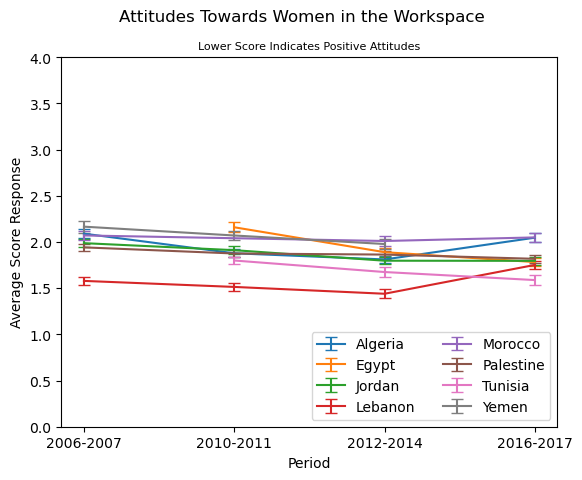

In [20]:

# Plot the data for each country as a separate line with error bars representing the confidence interval
fig, ax = plt.subplots()
for country in included_countries:
    x = means.loc[pd.IndexSlice[:, country]].index.get_level_values(0)
    y = means.loc[pd.IndexSlice[:, country]]
    err = ci.loc[pd.IndexSlice[:, country]]
    ax.errorbar(x, y, yerr=err, label=country, capsize=4)

# Set the title and axis labels
plt.title('Lower Score Indicates Positive Attitudes',fontsize=8)
plt.suptitle('Attitudes Towards Women in the Workspace')
ax.set_xlabel('Period')
ax.set_ylabel('Average Score Response')
ax.set_ylim(0,4)
ax.legend(loc='lower right', ncol=4)

handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
    labels[i] = label.title()
ax.legend(handles, labels, loc='lower right', ncol=2)

plt.show()

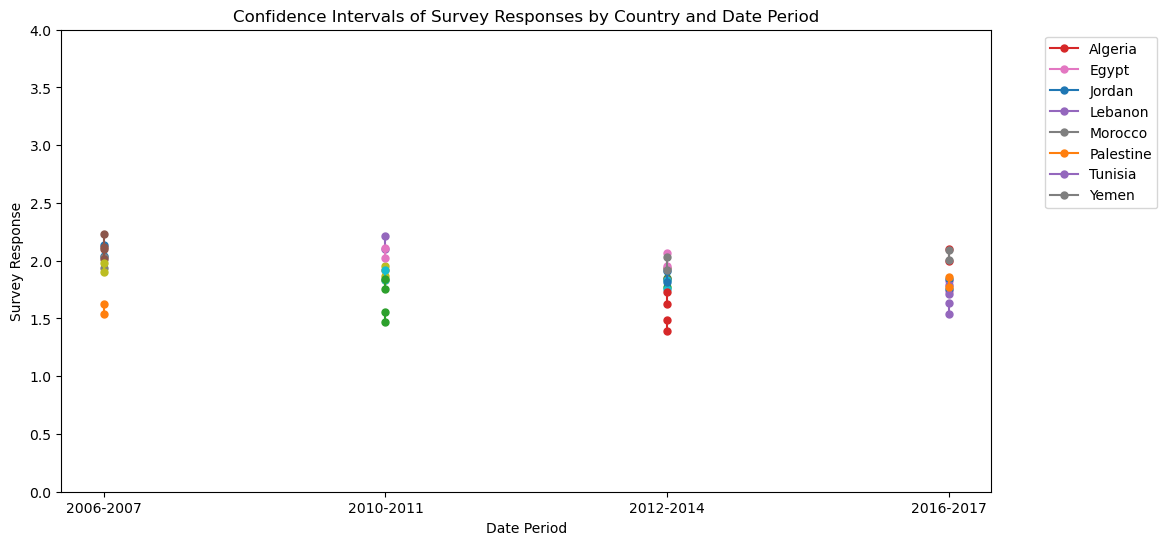

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Assuming the given DataFrame is named `bounds`
countries = bounds.columns
date_periods = bounds.index.levels[0].tolist()

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through countries and date_periods to plot confidence intervals
for idx, country in enumerate(countries):
    for period_idx, date_period in enumerate(date_periods):
        lower_bound = bounds.loc[(date_period, 'Lower Bound'), country]
        upper_bound = bounds.loc[(date_period, 'Upper Bound'), country]

        if not (np.isnan(lower_bound) or np.isnan(upper_bound)):
            plt.plot([period_idx] * 2, [lower_bound, upper_bound], marker='o', linestyle='-', linewidth=1.5, markersize=5, label=country)

# Set the x-axis labels
plt.xticks(range(len(date_periods)), date_periods)

# Add title and labels
plt.title("Confidence Intervals of Survey Responses by Country and Date Period")
plt.xlabel("Date Period")
plt.ylabel("Survey Response")
plt.ylim(0,4)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


country,Algeria,Egypt,Jordan,Lebanon,Morocco,Palestine,Tunisia,Yemen
Period,,,,,,,,
2006-2007,0.101,NaN,0.092,0.086,0.106,0.076,NaN,0.129
2010-2011,0.091,0.112,0.094,0.094,NaN,0.084,0.082,0.089
2012-2014,0.083,0.095,0.079,0.092,0.110,0.088,0.107,0.109
2016-2017,0.104,0.092,0.087,0.082,0.092,0.085,0.102,NaN


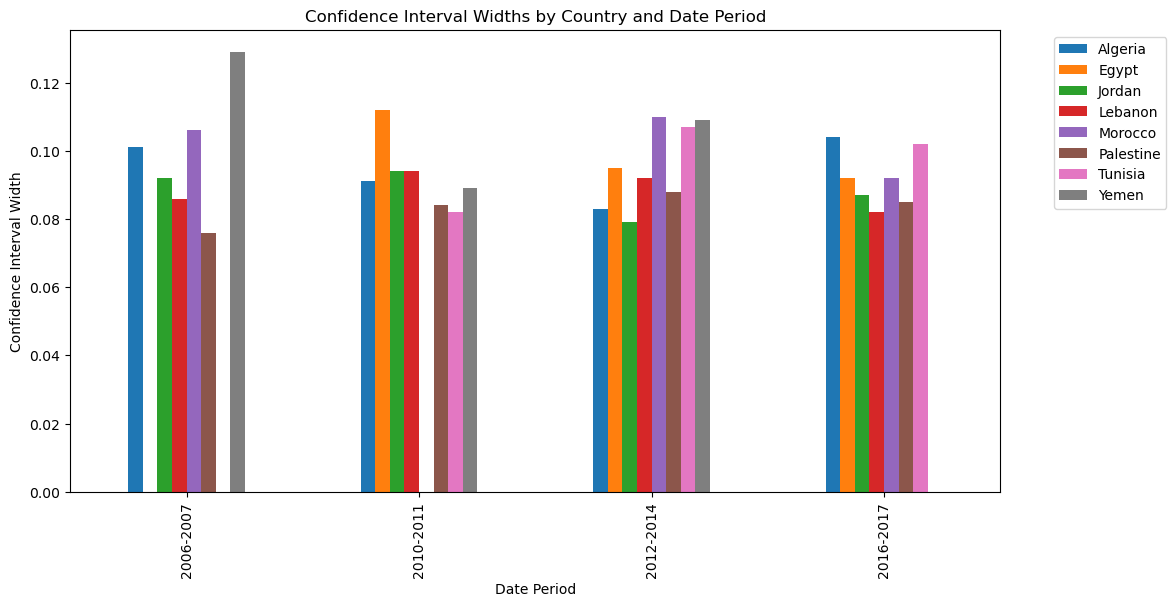

In [22]:
# Get the upper and lower bounds as separate DataFrames
upper_bounds = bounds.xs('Upper Bound', level=1)
lower_bounds = bounds.xs('Lower Bound', level=1)

# Calculate the confidence interval widths
interval_widths = upper_bounds - lower_bounds
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the confidence interval widths as a bar plot
interval_widths.plot(kind='bar', ax=ax)

# Set the x-axis labels
plt.xticks(range(len(date_periods)), date_periods)

# Add title and labels
plt.title("Confidence Interval Widths by Country and Date Period")
plt.xlabel("Date Period")
plt.ylabel("Confidence Interval Width")

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

display(interval_widths)
# Show the plot
plt.show()


In [23]:
average_interval_widths = interval_widths.mean(axis=1, skipna=True)
average_interval_width= pd.DataFrame(average_interval_widths,columns=['Average Interval Widths'])
average_interval_width.reset_index(inplace=True)
display(average_interval_width)

average_interval_widths_by_country = interval_widths.mean(axis=0, skipna=True)
average_interval_width_by_country= pd.DataFrame(average_interval_widths_by_country,columns=['Average Interval Widths'])
average_interval_width_by_country.reset_index(inplace=True)
average_interval_width=average_interval_width.rename(columns={'country':'Country'})
display(average_interval_width_by_country)

,Period,Average Interval Widths
0,2006-2007,0.098333
1,2010-2011,0.092286
2,2012-2014,0.095375
3,2016-2017,0.092000


,country,Average Interval Widths
0,Algeria,0.094750
1,Egypt,0.099667
2,Jordan,0.088000
3,Lebanon,0.088500
4,Morocco,0.102667
5,Palestine,0.083250
6,Tunisia,0.097000
7,Yemen,0.109000


In [31]:
average_interval_width['Average Interval Widths'].mean()

0.09449851190476193

In [32]:
average_interval_width_by_country['Average Interval Widths'].mean()

0.09535416666666668